# Imports

In [1]:
import cv2 as cv
from utils import find_biggest_contour,show_images,wrapped_paper,cropp_box_image,replace_image_with_white,finall_extract,correct_id_mcq,split_questions
import numpy as np

In [2]:
width=480
height=480
borders=30

# Read Image

In [3]:
path=input("Enter the path of the image")
image=cv.resize(cv.imread(path),(width,height))

# Preprocessing

## 1-Get the edges

In [4]:
gray=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
blur=cv.GaussianBlur(gray,(5,5),1)
edged = cv.Canny(blur,75, 100)

## 2-Get the contours


In [5]:
edge_copy=edged.copy()
contours, hierarchy = cv.findContours(edge_copy, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
image_color = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)
cv.drawContours(image_color, contours, -1, (0, 255, 0), 10)
print("")

## 3-Get the paper

In [6]:
biggest,max_area=find_biggest_contour(contours)

In [7]:
wrapped_paper_image=wrapped_paper(width,height,biggest,blur)
wrapped_paper_gray=wrapped_paper(width,height,biggest,gray)


## 4-Thresold

In [8]:
adaptive_thresh = cv.adaptiveThreshold(
    wrapped_paper_image, 
    255, 
    cv.ADAPTIVE_THRESH_GAUSSIAN_C,  # Use Gaussian weights for neighborhood
    cv.THRESH_BINARY, 
    11,  # Block size (neighborhood size)
    2   # Constant subtracted from the mean
)


## 4-Remove impluse Noise

In [9]:

# Step 4: Replace noise with white patches
contours, _ = cv.findContours(adaptive_thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
output = adaptive_thresh.copy()
replace_image_with_white(contours,output,  30)
   

## 6-Extract Box

In [10]:

actual_box_addative,actual_box_gray=cropp_box_image(output,width,height,wrapped_paper_gray)
cv.imshow("1 Contours", actual_box_gray)
cv.waitKey(0)
cv.destroyAllWindows()


## 7-Remove Name section

In [11]:
mcq_regions,id,name=finall_extract(actual_box_addative,actual_box_gray)

53
57


## Correction 

In [12]:
for question in mcq_regions:
    answers=split_questions(question)
    for question in answers :
        print(np.argmin(question))
        

13
anser [170.7878787878788, 165.43589743589746, 156.30769230769232]
anser [167.02020202020202, 160.16666666666666, 159.8095238095238]
anser [166.04040404040404, 163.71794871794873, 155.11965811965814]
anser [156.55555555555557, 151.30555555555554, 151.17094017094018]
anser [154.5757575757576, 143.46296296296296, 163.10833333333332]
anser [135.98863636363637, 142.125, 150.83333333333331]
anser [154.23232323232324, 139.03703703703704, 153.44444444444443]
anser [145.94949494949495, 128.64814814814815, 153.25]
anser [152.06060606060606, 130.8148148148148, 162.52991452991455]
anser [141.64646464646466, 135.8148148148148, 133.78703703703704]
anser [144.65656565656568, 135.60683760683762, 152.52136752136752]
anser [128.0909090909091, 137.37962962962962, 141.96296296296296]
anser [131.925, 120.5897435897436, 149.94871794871796]
2
2
2
2
1
0
1
1
1
2
1
0
1


# Show Image

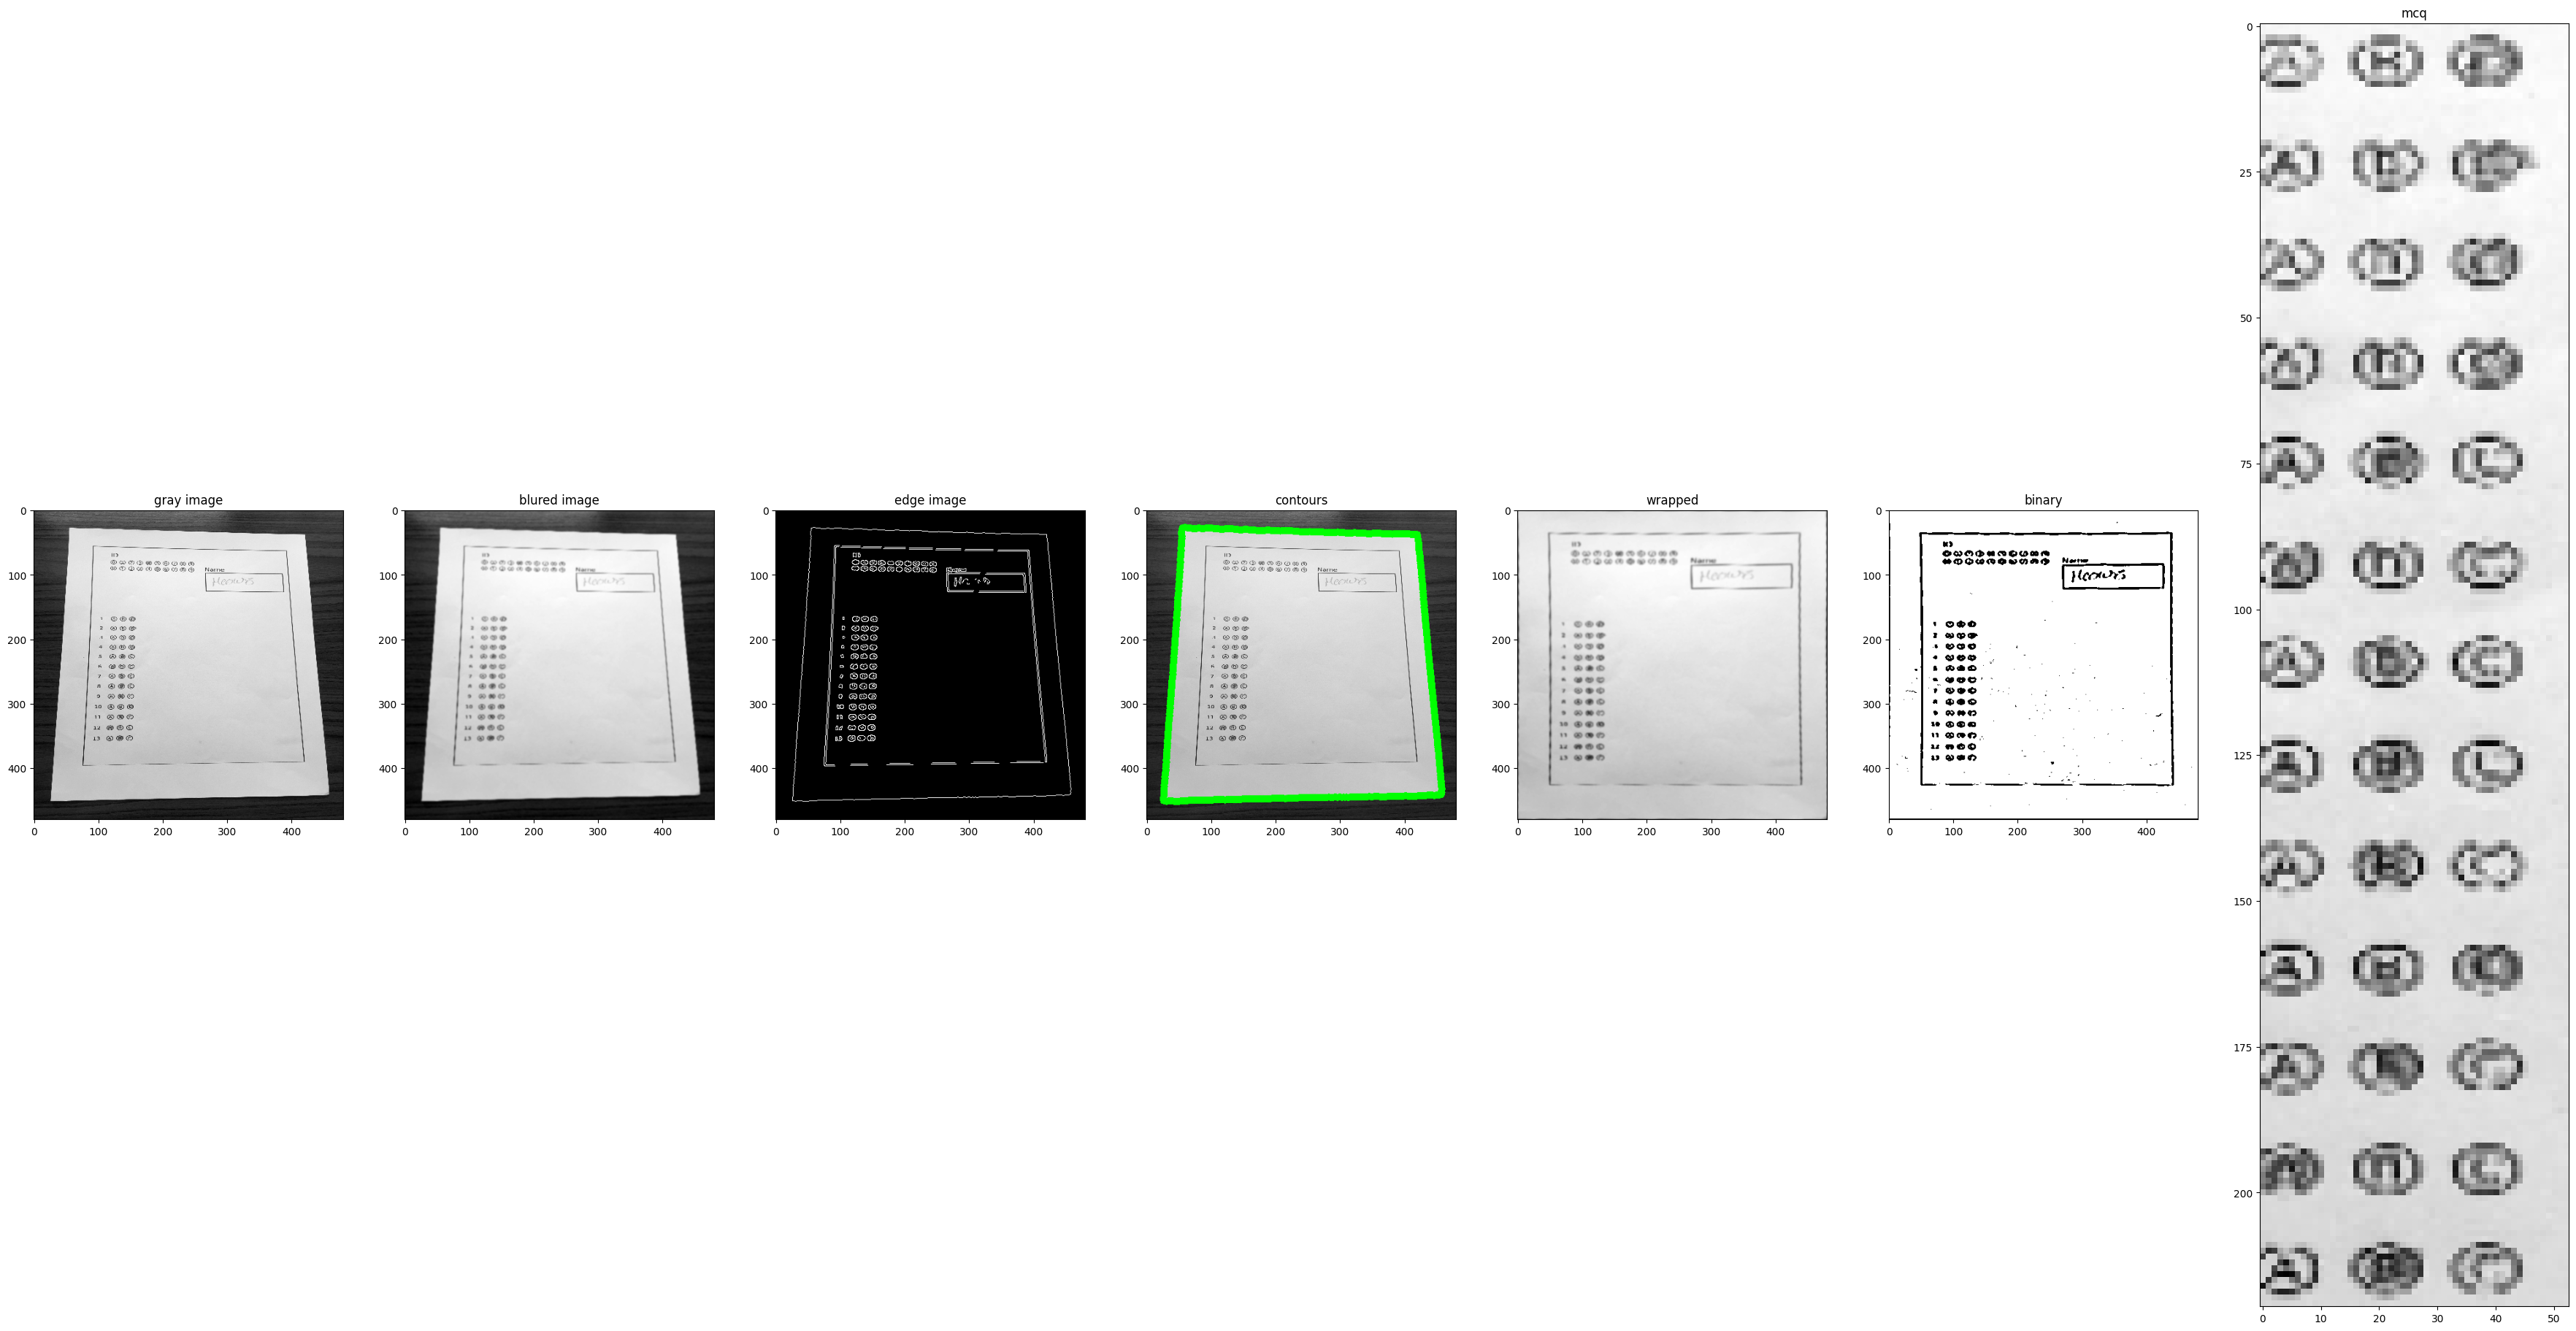

In [13]:
show_images([gray,blur,edged,image_color,wrapped_paper_image,adaptive_thresh,mcq_regions[0]],["gray image","blured image","edge image","contours","wrapped","binary","mcq"])